In [1]:
from keras.preprocessing.image import load_img , img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions , VGG16

Using TensorFlow backend.


In [2]:
model = VGG16()

In [3]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [5]:
from keras.utils.vis_utils import plot_model
# model = VGG16()
# plot_model(model, to_file = 'vgg.png')

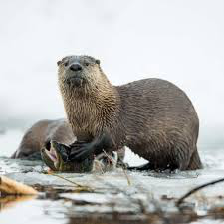

In [36]:
image = load_img('sury.jpg' , target_size = (224 , 224))
image

In [37]:
image = img_to_array(image)
image

array([[[233., 236., 241.],
        [233., 236., 241.],
        [233., 236., 241.],
        ...,
        [239., 242., 247.],
        [239., 242., 247.],
        [238., 241., 246.]],

       [[233., 236., 241.],
        [233., 236., 241.],
        [233., 236., 241.],
        ...,
        [239., 242., 247.],
        [239., 242., 247.],
        [238., 241., 246.]],

       [[233., 236., 241.],
        [233., 236., 241.],
        [233., 236., 241.],
        ...,
        [239., 242., 247.],
        [239., 242., 247.],
        [238., 241., 246.]],

       ...,

       [[235., 238., 229.],
        [235., 238., 229.],
        [236., 239., 230.],
        ...,
        [171., 171., 169.],
        [168., 169., 164.],
        [180., 182., 181.]],

       [[236., 238., 227.],
        [236., 238., 227.],
        [236., 239., 228.],
        ...,
        [194., 194., 192.],
        [198., 199., 194.],
        [210., 212., 211.]],

       [[233., 236., 241.],
        [233., 236., 241.],
        [233., 2

In [38]:
image = image.reshape((1 , image.shape[0] , image.shape[1] , image.shape[2]))
image

array([[[[233., 236., 241.],
         [233., 236., 241.],
         [233., 236., 241.],
         ...,
         [239., 242., 247.],
         [239., 242., 247.],
         [238., 241., 246.]],

        [[233., 236., 241.],
         [233., 236., 241.],
         [233., 236., 241.],
         ...,
         [239., 242., 247.],
         [239., 242., 247.],
         [238., 241., 246.]],

        [[233., 236., 241.],
         [233., 236., 241.],
         [233., 236., 241.],
         ...,
         [239., 242., 247.],
         [239., 242., 247.],
         [238., 241., 246.]],

        ...,

        [[235., 238., 229.],
         [235., 238., 229.],
         [236., 239., 230.],
         ...,
         [171., 171., 169.],
         [168., 169., 164.],
         [180., 182., 181.]],

        [[236., 238., 227.],
         [236., 238., 227.],
         [236., 239., 228.],
         ...,
         [194., 194., 192.],
         [198., 199., 194.],
         [210., 212., 211.]],

        [[233., 236., 241.],
       

In [39]:
# The only preprocessing we do is subtracting the mean RGB value, computed on the training set, from each pixel.
image = preprocess_input(image)
image

array([[[[137.061   , 119.221   , 109.32    ],
         [137.061   , 119.221   , 109.32    ],
         [137.061   , 119.221   , 109.32    ],
         ...,
         [143.061   , 125.221   , 115.32    ],
         [143.061   , 125.221   , 115.32    ],
         [142.061   , 124.221   , 114.32    ]],

        [[137.061   , 119.221   , 109.32    ],
         [137.061   , 119.221   , 109.32    ],
         [137.061   , 119.221   , 109.32    ],
         ...,
         [143.061   , 125.221   , 115.32    ],
         [143.061   , 125.221   , 115.32    ],
         [142.061   , 124.221   , 114.32    ]],

        [[137.061   , 119.221   , 109.32    ],
         [137.061   , 119.221   , 109.32    ],
         [137.061   , 119.221   , 109.32    ],
         ...,
         [143.061   , 125.221   , 115.32    ],
         [143.061   , 125.221   , 115.32    ],
         [142.061   , 124.221   , 114.32    ]],

        ...,

        [[125.061   , 121.221   , 111.32    ],
         [125.061   , 121.221   , 111.32    ]

In [40]:
y_pred = model.predict(image)
y_pred[:,10]

array([1.3615527e-10], dtype=float32)

In [41]:
label = decode_predictions(y_pred)
label

[[('n02444819', 'otter', 0.9841687),
  ('n02441942', 'weasel', 0.0071825203),
  ('n02442845', 'mink', 0.007159064),
  ('n02363005', 'beaver', 0.0006502454),
  ('n02361337', 'marmot', 0.00055121555)]]

In [42]:
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

otter (98.42%)
